LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

['Iris-versicolor' 'Iris-versicolor']


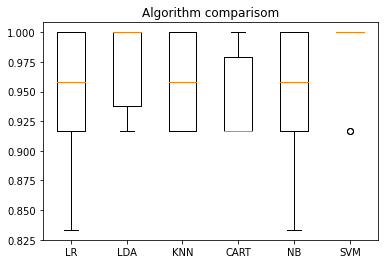

In [71]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

#shape
#print(dataset.shape)
#head
#print(dataset.head(20))
#descriptions
#print(dataset.describe())

# #Class Distribution
# print(dataset.groupby('class').size())

# # box and whisker plots
# dataset.plot(kind='box',subplots=True, layout=(2,2),sharex=False,sharey=False)
# pyplot.show()

# # histograms
# dataset.hist()
# pyplot.show()

# # scatter plot matrix
# scatter_matrix(dataset)
# pyplot.show()

# split out validation data
array=dataset.values
X=array[:,0:4]
y=array[:,4]
X_train,X_validation,Y_train,Y_validation=train_test_split(X,y,test_size=0.2,random_state=1)

# spot check algorythms
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
# Evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))
#Compare algorythms
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm comparisom')
    
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
filenam='file_of_trained_model.sav'
joblib.dump(model,filenam)


loaded_model=joblib.load('file_of_trained_model.sav')
predictions = loaded_model.predict(X_validation)
#Evaluate predictions
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))
# Predict any data from model   
X_new = [[5,2.06,3.7,1.1],[5.9,3,4.2,1.5]]
Y_new=loaded_model.predict(X_new)
print(Y_new)

# #Predict probability of it being of various classes
# Y_prob=loaded_model.predict_proba(X_new)
# print(Y_prob)         #MAy be not available for SVM

